# PROYECTO FINAL
### ALUMNO: MARCELO ALBERTO SANCHEZ ZARAGOZA


# Ahora vemos cada participante por separado

In [16]:
from PIL import Image
from sklearn import metrics
import numpy as np
import cv2
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import isfile, join
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

ruta1 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_1'
ruta2 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_2'
ruta3 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_3'
ruta4 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_4'
ruta5 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_5'
ruta6 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_6'
ruta7 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_7'
ruta8 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_8'
ruta9 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_9'
ruta10 = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos_chinitas\chinita_10'

contenido1 = os.listdir(ruta1)
contenido2 = os.listdir(ruta2)
contenido3 = os.listdir(ruta3)
contenido4 = os.listdir(ruta4)
contenido5 = os.listdir(ruta5)
contenido6 = os.listdir(ruta6)
contenido7 = os.listdir(ruta7)
contenido8 = os.listdir(ruta8)
contenido9 = os.listdir(ruta9)
contenido10 = os.listdir(ruta10)

In [2]:
info = pd.read_csv('class.csv',encoding='latin1')
#info

In [3]:
y1 = info.iloc[0:19,3]
y2 = info.iloc[19:38,3]
y3 = info.iloc[38:57,3]
y4 = info.iloc[57:74,3]
y5 = info.iloc[74:92,3]
y6 = info.iloc[92:110,3]
y7 = info.iloc[110:127,3]
y8 = info.iloc[127:145,3]
y9 = info.iloc[145:163,3]
y10 = info.iloc[163:180,3]

In [4]:
len(y2)

19

In [33]:
archivos = [nombre for nombre in contenido2 if isfile(join(ruta2, nombre))]
#archivos

#### Nota: para correr para cada una de las participantes hay que ir moviendo las variables: rutai, yi y contenidoi, donde i=1,...10.

In [26]:
Todos_1 = []
g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
#g_kernel = cv2.getGaborKernel((5, 5), np.pi/1, np.pi/1, 5.5, 3.8, 1.0, ktype=cv2.CV_32F)
for r in range(len(y2)):
    img = cv2.imread(join(ruta2, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    
    #out = Gabor_process(img)
    
    l = []
    p = filtered_img
    #for i in range(40):
    #    for j in range(190):
    #        l.append(p[i+50,j+30])
            
    for i in range(256):
        for j in range(256):
            l.append(p[i,j])
    
    #for i in range(256):
     #   for j in range(256):
      #      l.append(out[i,j])
    
    Todos_1.append(l)#filtered_img

In [27]:
Feo = np.array(Todos_1)
#Feo.shape
v = pd.DataFrame(Feo)
v/255

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0.192157,0.196078,0.192157,0.188235,0.192157,0.196078,0.200000,0.188235,0.168627,0.160784,...,0.164706,0.184314,0.188235,0.192157,0.188235,0.172549,0.160784,0.156863,0.160784,0.160784
1,0.207843,0.203922,0.184314,0.172549,0.176471,0.180392,0.180392,0.176471,0.188235,0.203922,...,0.176471,0.180392,0.184314,0.188235,0.200000,0.203922,0.196078,0.180392,0.176471,0.180392
2,0.184314,0.180392,0.176471,0.176471,0.192157,0.192157,0.172549,0.172549,0.184314,0.172549,...,0.164706,0.188235,0.192157,0.180392,0.176471,0.172549,0.164706,0.172549,0.184314,0.192157
3,0.176471,0.180392,0.196078,0.211765,0.207843,0.192157,0.176471,0.184314,0.196078,0.192157,...,0.211765,0.207843,0.192157,0.184314,0.188235,0.192157,0.203922,0.200000,0.200000,0.207843
4,0.196078,0.196078,0.192157,0.184314,0.188235,0.207843,0.211765,0.207843,0.211765,0.211765,...,0.200000,0.184314,0.176471,0.172549,0.164706,0.156863,0.149020,0.156863,0.180392,0.192157
5,0.180392,0.184314,0.192157,0.200000,0.192157,0.176471,0.164706,0.164706,0.180392,0.188235,...,0.235294,0.223529,0.211765,0.223529,0.227451,0.215686,0.211765,0.207843,0.200000,0.192157
6,0.203922,0.192157,0.176471,0.176471,0.164706,0.156863,0.168627,0.180392,0.180392,0.172549,...,0.211765,0.215686,0.207843,0.207843,0.196078,0.176471,0.160784,0.160784,0.160784,0.164706
7,0.176471,0.176471,0.176471,0.164706,0.156863,0.156863,0.160784,0.168627,0.172549,0.180392,...,0.145098,0.129412,0.129412,0.137255,0.156863,0.180392,0.188235,0.172549,0.160784,0.160784
8,0.152941,0.156863,0.160784,0.164706,0.164706,0.164706,0.168627,0.176471,0.184314,0.184314,...,0.160784,0.156863,0.156863,0.156863,0.164706,0.180392,0.184314,0.172549,0.168627,0.168627
9,0.149020,0.152941,0.160784,0.172549,0.172549,0.172549,0.180392,0.180392,0.180392,0.192157,...,0.164706,0.156863,0.168627,0.168627,0.160784,0.164706,0.172549,0.176471,0.172549,0.164706


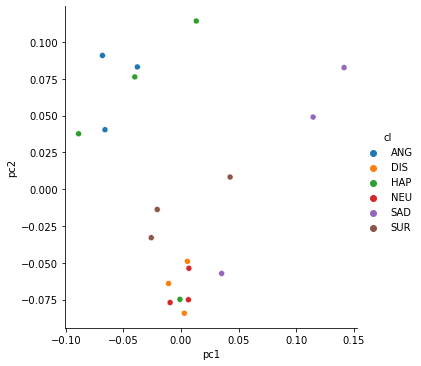

In [28]:
from sklearn.decomposition import KernelPCA # estandarizar y justificar
import seaborn as sns

sigma = 5.1 #0.8
ncomp = len(y2)
kpca = KernelPCA(n_components=ncomp, kernel='cosine', gamma=1/sigma) ##linear,poly,rbf,sigmoid-b,cosine,precomputed
# rbf - 
# sigmoid - 
# cosine - 0.1 dio buen resultado en redes 0.78 y 0.81 en maquinas de soporte vectorial
# linear 1.5
# poly 5.5 y 1.1 con maquinas de sopote vectorial
mesh_kpca = kpca.fit_transform(v/255) #X_sphere-estandar
comps = pd.DataFrame(mesh_kpca)
#comps

g = {'PC':range(0,180), 'pc1':comps.iloc[:,4], 'pc2':comps.iloc[:,2], 'cl':info.iloc[:,3]}
G = pd.DataFrame(g)
#G
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='cl',data=G)

In [29]:
from sklearn.model_selection import train_test_split

datos_lim = pd.DataFrame(mesh_kpca)
#datos_lim

X_train, X_test = train_test_split(datos_lim, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y1, test_size=0.2, train_size=0.8, random_state=42)

In [30]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.082372,0.011270,0.040400,0.070047,-0.066070,0.082949,-0.010263,-0.032222,-0.069630,0.018320,-0.058897,0.022363,0.015603,-0.067010,-0.006427,-0.021916,-0.002405,0.003950,0.0
5,-0.133784,0.015511,-0.084270,-0.016518,0.002874,-0.054205,-0.079547,0.037491,0.025550,-0.060980,0.013565,0.032858,0.003493,-0.031238,0.034728,-0.055868,-0.014654,0.002864,0.0
11,0.124468,-0.101664,-0.053760,0.064878,0.006832,-0.019635,-0.014280,-0.037919,-0.017225,0.007620,0.012363,0.006352,-0.088787,-0.015790,0.012783,0.006098,-0.004439,-0.054709,0.0
1,-0.076844,0.033295,0.083048,0.080479,-0.037935,0.069224,-0.073076,-0.003514,-0.009399,-0.015349,0.082275,-0.020618,-0.003235,0.060208,0.004233,0.009513,-0.003113,-0.002059,0.0


In [31]:
y_test

0     ANG
5     DIS
11    NEU
1     ANG
Name: file.expression, dtype: object

### Maquinas de soporte vectorial

In [32]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train, y_train)
y_pred_hat = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_hat))
#plt.rcParams['figure.figsize'] = (8, 6)
#disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
#disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
#plt.show()

              precision    recall  f1-score   support

         ANG       0.00      0.00      0.00         2
         DIS       1.00      1.00      1.00         1
         HAP       0.00      0.00      0.00         0
         NEU       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Redes Neuronales 

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.00      0.00      0.00       2.0
         DIS       0.00      0.00      0.00       1.0
         HAP       0.00      0.00      0.00       0.0
         NEU       0.00      0.00      0.00       1.0
         SUR       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LDa

In [37]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.00      0.00      0.00         2
         DIS       0.00      0.00      0.00         1
         NEU       1.00      1.00      1.00         1
         SAD       0.00      0.00      0.00         0
         SUR       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.20      0.20      0.20         4
weighted avg       0.25      0.25      0.25         4



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
